### Хочу сначала отобрать признаки. Признаки с низкой дисперсией скорее всего менее информативны, поэтому, сначала сделаю отбор по дисперсии. В следующем ноутбуке хочу попробовать SBS алгоритм.

In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
from glob import glob
import os
import math
import functools
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin

In [2]:
warnings.simplefilter('ignore') # отключим предупреждения Anaconda

In [197]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS2021/N-PLS/X_new.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS2021/N-PLS/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)

(206,)


In [198]:
X_big=Xdata_numpy['X']

In [199]:
import  subprocess
import sys
import os
from PLS1_help_scripts.regression import new_PLS1_regression

In [239]:
r2cv_best=np.zeros([10,3])
r2c_best=np.zeros([10,3])
r2p_best=np.zeros([10,3])

In [240]:
for i in range(1,11,1):
    for j in range(1,4,1):
        model=new_PLS1_regression(n_components=5,
                          var_excitation=i*0.01,
                          var_emission=j*0.002)
        result=model.regression(X_big.copy(),Ydata.copy(),Xdata_numpy['excitation'],
                          Xdata_numpy['emission'],type_matter=0,
                          test_size_=0.1428)
        
        r2cv_best[i-1,j-1]=max(result.r2_cv)
        r2c_best[i-1,j-1]=max(result.r2_c)
        r2p_best[i-1,j-1]=result.r2_p

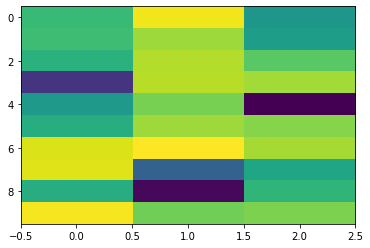

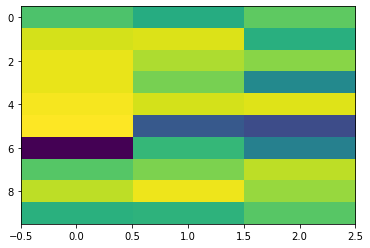

In [241]:
plt.imshow(r2cv_best[:,:], aspect='auto')
plt.show();
plt.imshow(r2p_best[:,:], aspect='auto')
plt.show();

In [242]:
r2cv_best

array([[0.52552399, 0.72010522, 0.42860273],
       [0.53326221, 0.63906024, 0.44569846],
       [0.49888747, 0.66014041, 0.56750065],
       [0.17915837, 0.66597225, 0.64557938],
       [0.43570484, 0.60211213, 0.08193066],
       [0.48804486, 0.63905034, 0.61626462],
       [0.70096151, 0.73503927, 0.64690371],
       [0.70292254, 0.28645714, 0.46480568],
       [0.48902522, 0.09664526, 0.50828242],
       [0.72624786, 0.59262507, 0.60637404]])

In [333]:
model=new_PLS1_regression(n_components=5,
                          var_excitation=0.058,
                          var_emission=0.004)

In [334]:
result=model.regression(X_big,Ydata,Xdata_numpy['excitation'],
                          Xdata_numpy['emission'],type_matter=0,
                          test_size_=0.15)

In [335]:
result.r2_p

0.4130382118950876

In [336]:
result.r2_cv

array([-0.39891416,  0.10236568,  0.73504317,  0.71011938,  0.38158194])

In [337]:
result.r2_c

array([0.13876578, 0.4941609 , 0.82546858, 0.86899766, 0.89843168])

In [338]:
result.best['n_components']

3